In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/CSE544_final_project'

/content/gdrive/My Drive/CSE544_final_project


# **Exploratory tasks to be performed on the X dataset**

For this section of the project we are performing certain inferences on the X dataset and US-all data set.

Our X dataset is as follows:

***Monthly Border crossing data for the state of Texas for 2019,2020, 2021***
https://explore.dot.gov/views/BorderCrossingData/Monthly?:isGuestRedirectFromVizportal=y&:embed=y"

We will be performing the following tasks:

Task 1: Pearson's Test

Task 2: Permutaion Test

Task 3: Chi-Square Test

Task 4: Linear Regression


In [ ]:
explorator_data = pd.read_csv("data/exploratory_dataset.csv")
print(explorator_data)

     Unnamed: 0                   Unnamed: 1  ...      2/21     3/21
0     Port Name                      Measure  ...  February    March
1     Boquillas                  Pedestrians  ...        11       30
2   Brownsville                  Pedestrians  ...    91,343  120,717
3   Brownsville  Personal Vehicle Passengers  ...   336,984  444,728
4   Brownsville            Personal Vehicles  ...   218,883  282,424
..          ...                          ...  ...       ...      ...
74         Roma                       Trucks  ...     2,060    2,661
75     Tornillo                  Pedestrians  ...     2,338    4,825
76     Tornillo  Personal Vehicle Passengers  ...    40,058   47,542
77     Tornillo            Personal Vehicles  ...    23,822   27,619
78        TOTAL                          NaN  ...   4893618  6279039

[79 rows x 29 columns]


## **Pearson's Test**

The test is between Border-crossing dataset and *COVID* data for the state of texas.

**1st Test:**

X = Border-Crossing data

Y = Confirm cases of COVID in Texas.

Null hypothesis(H_0) is that X and Y are not linearly correlated.

Alternate Hypothesis(H_1) is X and Y are linearly  correlated.


**2nd Test:**

X = Border-Crossing data

Y = Death cases of COVID in Texas.

Null hypothesis(H_0) is that X and Y are not linearly correlated.

Alternate Hypothesis(H_1) is X and Y are linearly  correlated.

In [ ]:
data = explorator_data.iloc[78:, 2:]

tx_bordercrossing_total = []
for i in range(27):
    tx_bordercrossing_total.append(int(data.iloc[0][i]))


def variance(data, data_mean):
    v = 0
    for d in data:
        v += (d - data_mean)**2

    return v


# Fetching monthly data for COVID confirm cases and Border-crossing data in Texas.
tx_confirm = pd.read_csv("data/tx_confirm_monthly.csv")
tx_confirm = tx_confirm.iloc[:, 1:]
tx_death = pd.read_csv("data/tx_death_monthly.csv")
tx_death = tx_death.iloc[:, 1:]


tx_confirm_ls = []
for i in range(15):
    tx_confirm_ls.append(int(tx_confirm.iloc[i][1]))

tx_death_ls = []
for i in range(15):
    tx_death_ls.append(int(tx_death.iloc[i][1]))

date_ls = []
for i in range(15):
    date_ls.append(tx_death.iloc[i][0])

tx_bordercrossing_total = tx_bordercrossing_total[12:]

In [ ]:
# Perform pearson's test and return pearson's correlation coefficient 
def pearsonTest(x, y):
    var_x = variance(x, st.mean(x))
    var_y = variance(y, st.mean(y))
    x_bar = st.mean(x)
    y_bar = st.mean(y)
    lenth = len(x)

    n = 0
    for i in range(lenth):
        n += (x[i] - x_bar) * (y[i] - y_bar)

    d = (var_x * var_y)**0.5
    p = n/d
    return p

In [ ]:
#pearson's correlation coefficients
p_confirm = pearsonTest(tx_bordercrossing_total, tx_confirm_ls)
p_death = pearsonTest(tx_bordercrossing_total, tx_death_ls)

print("Pearson's correlation coefficient for texas COVID confirm cases and border crossing through the state of texas: ",abs(p_confirm),"\nPearson's correlation coefficient for texas COVID death cases and border crossing through the state of texas: ", abs(p_death))

# critical value = 0.3
print("\nPearson's Test 1")
if abs(p_confirm) <= 0.3:
    print("Accept Null. Therefore, border crossing data and COVID confirm cases for the state of texas has no correlation.")
elif abs(p_confirm) > 0.3:
    if p_confirm > 0.3:
        print("Reject Null. Therefore, border crossing data and COVID confirm cases for the state of texas has a positive linearly correlation.i.e both follow the same trend")
    elif p_confirm < -0.3:
        print("Reject Null. Therefore, border crossing data and COVID confirm cases for the state of texas has a negative linearly correlation.i.e both follow the opposite trend")


print("\nPearson's Test 2")

if abs(p_death) <= 0.3:
    print("Accept Null. Therefore, border crossing data and COVID death for the state of texas has no correlation.")
elif abs(p_death) > 0.3:
    if p_death> 0.3:
        print("Reject Null. Therefore, border crossing data and COVID death for the state of texas has a positive linearly correlation.i.e both follow the same trend")
    elif p_death < -0.3:
        print("Reject Null. Therefore, border crossing data and COVID death for the state of texas has a negative linearly correlation.i.e both follow the opposite trend")



Pearson's correlation coefficient for texas COVID confirm cases and border crossing through the state of texas:  0.33943927611534375 
Pearson's correlation coefficient for texas COVID death cases and border crossing through the state of texas:  0.40568461243857534

Pearson's Test 1
Reject Null. Therefore, border crossing data and COVID confirm cases for the state of texas has a negative linearly correlation.i.e both follow the opposite trend

Pearson's Test 2
Reject Null. Therefore, border crossing data and COVID death for the state of texas has a negative linearly correlation.i.e both follow the opposite trend


<Figure size 432x288 with 0 Axes>

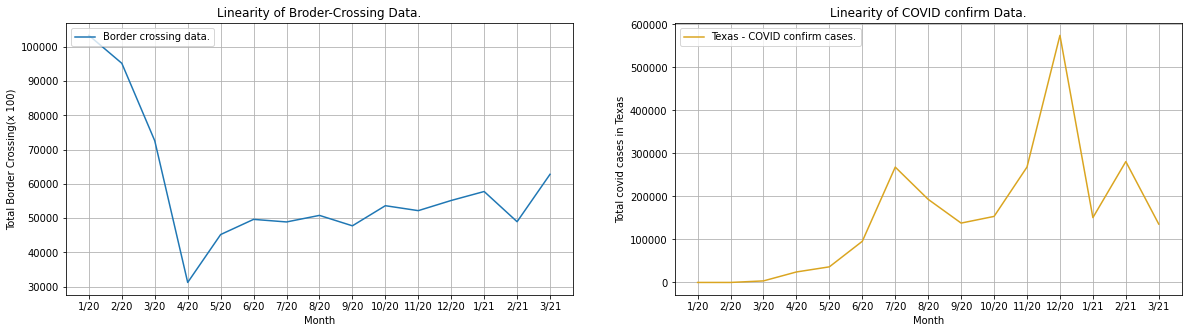

In [ ]:
plt.figure("Pearson's Test 1")
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
newList = [x / 100 for x in tx_bordercrossing_total]
plt.plot(date_ls, newList ,label='Border crossing data.')
plt.xlabel('Month')
plt.ylabel('Total Border Crossing(x 100)')
plt.title("Linearity of Broder-Crossing Data.")
plt.legend(loc="upper left")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(date_ls, tx_confirm_ls, color='goldenrod' ,label='Texas - COVID confirm cases.')
plt.xlabel('Month')
plt.ylabel('Total covid cases in Texas')
plt.title("Linearity of COVID confirm Data.")
plt.legend(loc="upper left")
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

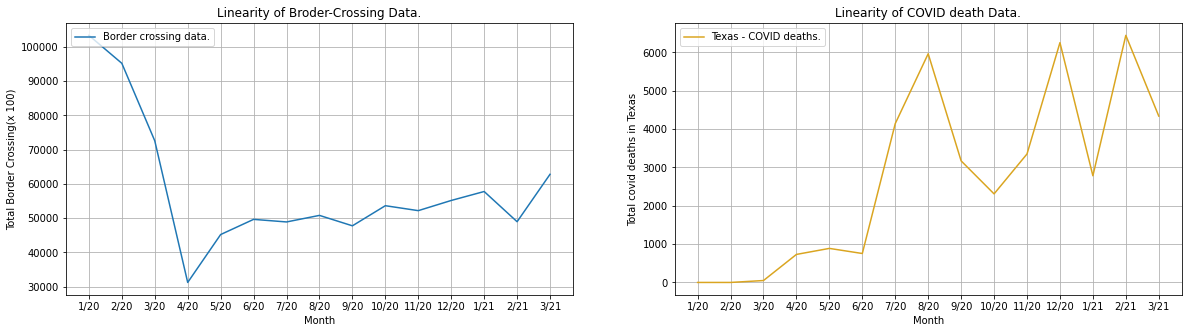

In [ ]:
plt.figure("Pearson's Test 2")
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
newList = [x / 100 for x in tx_bordercrossing_total]
plt.plot(date_ls, newList ,label='Border crossing data.')
plt.xlabel('Month')
plt.ylabel('Total Border Crossing(x 100)')
plt.title("Linearity of Broder-Crossing Data.")
plt.legend(loc="upper left")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(date_ls, tx_death_ls, color = 'goldenrod',label='Texas - COVID deaths.')
plt.xlabel('Month')
plt.ylabel('Total covid deaths in Texas')
plt.title("Linearity of COVID death Data.")
plt.legend(loc="upper left")
plt.grid()
plt.show()


### **Inference of Pearson's Test**

For both the set of tests, it can be inferred from the results that border-crossing activity and Covid confirm cases in Texas followed very opposite trends. Also, this can be the inference between broder-crossing activity and Covid deaths in Texas as well. Moreover, it is quite evident from the graphs that as and when the Covid confirm cases and Covid deaths in texas began its rise, the broder-crossings in texas plummeted. Intrestingly, it was during the COVID lock-down(Feb 2020 to April 2020) in texas when the border-crossing experienced its highest descent with April 2020 having the lowest value.

## **Permutation Test**

The test is between Border-crossing dataset and COVID data for the state of texas.

Total permutation used: 1000

1st Test:

X = Border-Crossing data

Y = Confirm cases of COVID in Texas.

Null hypothesis(H_0) is that X and Y are having same distribution

Alternate Hypothesis(H_1) is X and Y are having diffeent distribution.

2nd Test:

X = Border-Crossing data

Y = Death cases of COVID in Texas.

Null hypothesis(H_0) is that X and Y are having same distribution

Alternate Hypothesis(H_1) is X and Y are having diffeent distribution.



In [ ]:
def permutation_test(union, sizeA, sizeB):
    np.random.shuffle(union)
    listA = union[:sizeA]
    listB = union[-sizeB:]
    return abs(listA.mean() - listB.mean())


def calculate_pvalue(listA, listB, Tobs, n):
    union_list = np.hstack([listA, listB])
    Ti_values = []
    for i in range(n):
        Ti_values.append(permutation_test(union_list, len(listA), len(listB)))

    count_Ti = []
    for i in range(n):
        if Ti_values[i] > Tobs:
            count_Ti.append(1)
        else:
            count_Ti.append(0)

    calculated_pValue = count_Ti.count(1) / n
    return calculated_pValue


def do_permutation_test(x, y, s):
    threshold = 0.05
    n = 1000
    
    null_hypothesis_cases = "Distribution of Border-Crossing and {} cases are same".format(s)
    T_observed = abs(x.mean() - y.mean())
    print("\n\nFor border-crossing data and the {} cases for the state of Texas :\n".format(s))
    print("Mean of border-crossing : ", x.mean())
    print("Mean of {} cases : ".format(s), y.mean())

    pValue = calculate_pvalue(x, y, T_observed, n)
    print("p-value = " + str(pValue) + " for n = " + str(n))
    print('Given threshold is :', threshold)
    if pValue > threshold:
        print("Null hypothesis (" + null_hypothesis_cases + ") is accepted.")
    else:
        print("Null hypothesis (" + null_hypothesis_cases + ") is rejected.")

In [ ]:
do_permutation_test(np.array(tx_bordercrossing_total), np.array(tx_confirm_ls), 'confirm')
do_permutation_test(np.array(tx_bordercrossing_total), np.array(tx_death_ls), 'death')



For border-crossing data and the confirm cases for the state of Texas :

Mean of border-crossing :  5833008.533333333
Mean of confirm cases :  154913.0
p-value = 0.0 for n = 1000
Given threshold is : 0.05
Null hypothesis (Distribution of Border-Crossing and confirm cases are same) is rejected.


For border-crossing data and the death cases for the state of Texas :

Mean of border-crossing :  5833008.533333333
Mean of death cases :  2745.733333333333
p-value = 0.0 for n = 1000
Given threshold is : 0.05
Null hypothesis (Distribution of Border-Crossing and death cases are same) is rejected.


### **Inference of Permutation Test**

For both the set of tests, as Null hypothesis is rejected, it can be inferred from the results that border-crossing activity and Covid confirm cases in Texas do not share same distribution type. And, this can be the inference between broder-crossing activity and Covid deaths in Texas as well. 


##**Chi-Square test for independence between given two datasets**

Here we are checking if the mode of border crossing(Pedestrians, Personal vehicles) in the state of Texas(X dataset) depends on covid-19 in the state.(subset of US-all dataset(Y dataset).

Our Null hypothesis(**H_0**) is that **X is independent on Y**.

Alternate Hypothesis(**H_1**) is **X is dependent on Y**.

After computing p-value for the test if p-value is < alpha = 0.05, we reject the null hypothesis otherwise we accept the null hypothesis.

Chi-square table will a 2*2 table.

Columns will be **Before Covid(Year 2019)**, **During covid(Year 2020)**.

Rows will be **Border crossing in state of Texas(Pedestrians)**

**Border crossing in state of Texas(Personal vehicles)**

In [ ]:
data = pd.read_csv('data/exploratory_dataset.csv')
data.rename(columns={'Unnamed: 0': 'Port name'}, inplace=True)
data.rename(columns={'Unnamed: 1': 'Mode of crossing'}, inplace=True)


# getting the list of month-wise border crossing by pedestrians and personal vehicles
def monthly_lst_mode_crossing(mode_of_crossing):
    monthly_crossings = data.loc[data['Mode of crossing'] == mode_of_crossing]
    mode_lst = []
    for i in range(2, monthly_crossings.shape[1]):
        lst = monthly_crossings.iloc[:, i]
        lst = lst.tolist()
        lst1 = []
        for i in lst:
            if isinstance(i, str):
                lst1.append(float(i.replace(',', '')))
            else:
                lst1.append((float(i)))
        mode_lst.append(sum(lst1))
    return mode_lst


monthly_crossing_pedestrians = monthly_lst_mode_crossing("Pedestrians")
monthly_crossing_personal_vehicles = monthly_lst_mode_crossing("Personal Vehicles")
monthly_crossing_pedestrians = [x for x in monthly_crossing_pedestrians if np.isnan(x) == False]
monthly_crossing_personal_vehicles = [x for x in monthly_crossing_personal_vehicles if np.isnan(x) == False]
# print((monthly_crossing_pedestrians))
# print((monthly_crossing_personal_vehicles))

pedestrians_total_crossings_19 = sum(monthly_crossing_pedestrians[0:12])
pedestrians_total_crossings_20 = sum(monthly_crossing_pedestrians[12:24])
personal_vehicles_crossings_19 = sum(monthly_crossing_personal_vehicles[0:12])
personal_vehicles_crossings_20 = sum(monthly_crossing_personal_vehicles[12:24])

# chi square test for independence/association
# does mode of crossing(Pedestrian, Personal vehicles) depend of Covid-19
# null hypothesis(H_o) is mode of crossing is independent of covid-19
# alternate hypothesis(H_1) is mode of crossing is dependent on covid-19

total_pedestrian_crossings = pedestrians_total_crossings_19+pedestrians_total_crossings_20
total_pers_veh_crossings = personal_vehicles_crossings_19+personal_vehicles_crossings_20
chi_table = np.array([[pedestrians_total_crossings_19, pedestrians_total_crossings_20, total_pedestrian_crossings],
                     [personal_vehicles_crossings_19, personal_vehicles_crossings_20, total_pers_veh_crossings],
                     [pedestrians_total_crossings_19+personal_vehicles_crossings_19,
                      pedestrians_total_crossings_20+personal_vehicles_crossings_20,
                      total_pedestrian_crossings+total_pers_veh_crossings]])
e11 = (chi_table[2][0]/chi_table[2][2]) * chi_table[0][2]
e12 = (chi_table[2][1]/chi_table[2][2]) * chi_table[0][2]
e21 = (chi_table[2][0]/chi_table[2][2]) * chi_table[1][2]
e22 = (chi_table[2][1]/chi_table[2][2]) * chi_table[1][2]

expected_chi_table = np.array([[e11, e12], [e21, e22]])

q_obs = 0
# calculating Q_obs
for i in range(0, 2):
    for j in range(0, 2):
        q_obs += (expected_chi_table[i][j]-chi_table[i][j])**2 / expected_chi_table[i][j]

# degrees of freedom(df) = no_of_rows-1 * no_of_columns-1
df = (len(expected_chi_table[0])-1) * len(expected_chi_table)-1
print("Q_obs is:" + str(q_obs))
print("Degrees of freedom are:" + str(df))
print("From the look up table we find out that the p-value is < 0.00001 i.e p-value < alpha = 0.05\nTherefore"
      " the null hypothesis that mode of transport for border crossing(pedestrian and personal vehicles)"
      " and emergence of covid-19 are independent\n"
      "is rejected and we get that mode of transport for border crossing and emergence of covid-19 are dependent.")

Q_obs is:998949.6280770081
Degrees of freedom are:1
From the look up table we find out that the p-value is < 0.00001 i.e p-value < alpha = 0.05
Therefore the null hypothesis that mode of transport for border crossing(pedestrian and personal vehicles) and emergence of covid-19 are independent
is rejected and we get that mode of transport for border crossing and emergence of covid-19 are dependent.


### **Inference of Chi-Square test**

From the look up table we find out that the p-value is < 0.00001 i.e p-value < alpha = 0.05
Therefore the null hypothesis that mode of transport for border crossing(pedestrian and personal vehicles) and emergence of covid-19 are independent
is rejected and we get that mode of transport for border crossing and emergence of covid-19 are dependent.


## **Linear Regression**

Prediction 1: Predicting COVID Confirm cases in texas.

Prediction 2: Predicting COVID Deaths in texas.

Prediction 3: Predicting Border-crossing activity in texas.

The above three predictions will be for April 2021, May 2021, June 2021, July 2021, Aug 2021.

In [ ]:
date_int_x = []
for i in range(len(date_ls)):
    date_int_x.append(i+1)

date_int_x = np.array(date_int_x)
tx_confirm_ls = np.array(tx_confirm_ls)
tx_death_ls = np.array(tx_death_ls)


def linearRegression(date_int_x, y):
    date_int_x = np.array(date_int_x)
    y = np.array(y)
  
    # average
    av_date_int_x = np.mean(date_int_x)
    av_y = np.mean(y)

    # summations
    dateTimesConfirmSum = np.sum(np.multiply(y, date_int_x))

    squaresumDate = np.sum(np.square(date_int_x))
    B_1 = (dateTimesConfirmSum - len(date_int_x) * av_date_int_x * av_y) / (squaresumDate - len(date_int_x) * (av_date_int_x) ** 2)

    B_0 = av_y - B_1 * av_date_int_x


    US_RegressionFit = []
    for y in date_int_x:
        US_RegressionFit.append(B_0 + B_1 * y)

    regressionFit = np.array(US_RegressionFit)

    return regressionFit, B_0, B_1

In [ ]:
fitC, b0, b1 = linearRegression(date_int_x, tx_confirm_ls)
print("Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: \n")
l = len(date_int_x)
for i in range(5):
    print("Prediction of the confirm cases in Texas during {}/2021: {}".format(i+4, b0 + b1*(l +(i+1))))
fitD, b0, b1 = linearRegression(date_int_x, tx_death_ls)

print("\n\nPredicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: \n")
l = len(date_int_x)
for i in range(5):
    print("Prediction of the deaths in Texas during {}/2021: {}".format(i+4, b0 + b1*(l +(i+1))))

fitB, b0, b1 = linearRegression(date_int_x, tx_bordercrossing_total)
print("\n\nPredicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: \n")
l = len(date_int_x)
for i in range(5):
    print("Prediction of the border-crossing in Texas during {}/2021: {}".format(i+4, b0 + b1*(l +(i+1))))

Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 

Prediction of the confirm cases in Texas during 4/2021: 333631.14285714284
Prediction of the confirm cases in Texas during 5/2021: 355970.9107142857
Prediction of the confirm cases in Texas during 6/2021: 378310.67857142864
Prediction of the confirm cases in Texas during 7/2021: 400650.4464285715
Prediction of the confirm cases in Texas during 8/2021: 422990.2142857143


Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 

Prediction of the deaths in Texas during 4/2021: 6012.333333333333
Prediction of the deaths in Texas during 5/2021: 6420.658333333333
Prediction of the deaths in Texas during 6/2021: 6828.983333333333
Prediction of the deaths in Texas during 7/2021: 7237.308333333333
Prediction of the deaths in Texas during 8/2021: 7645.633333333333


Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 

Prediction of the border-crossing 

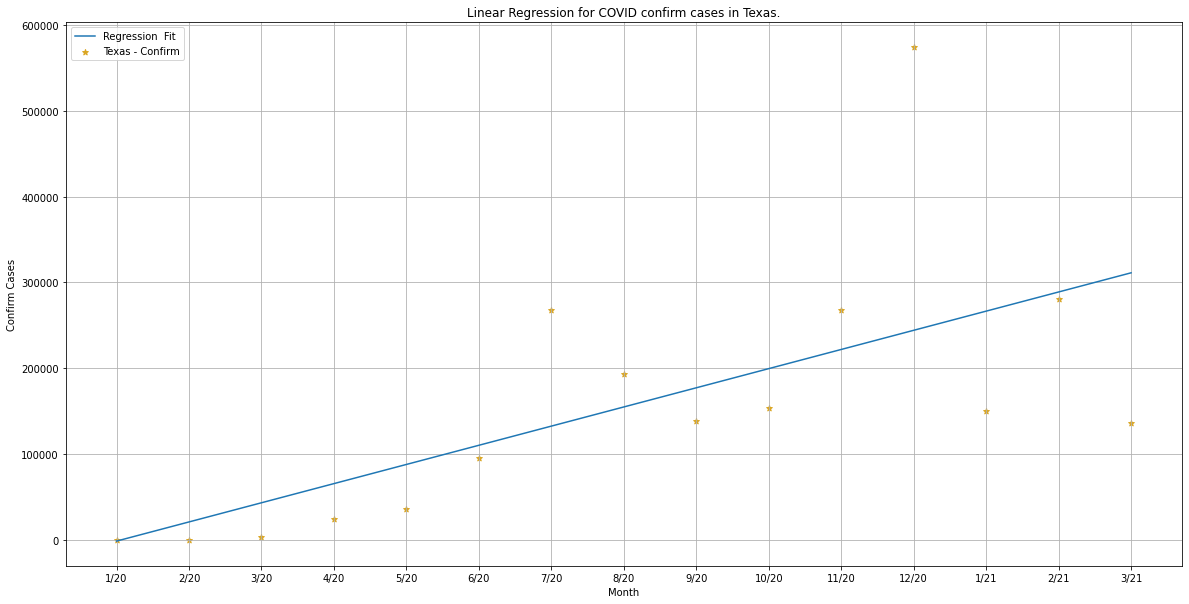

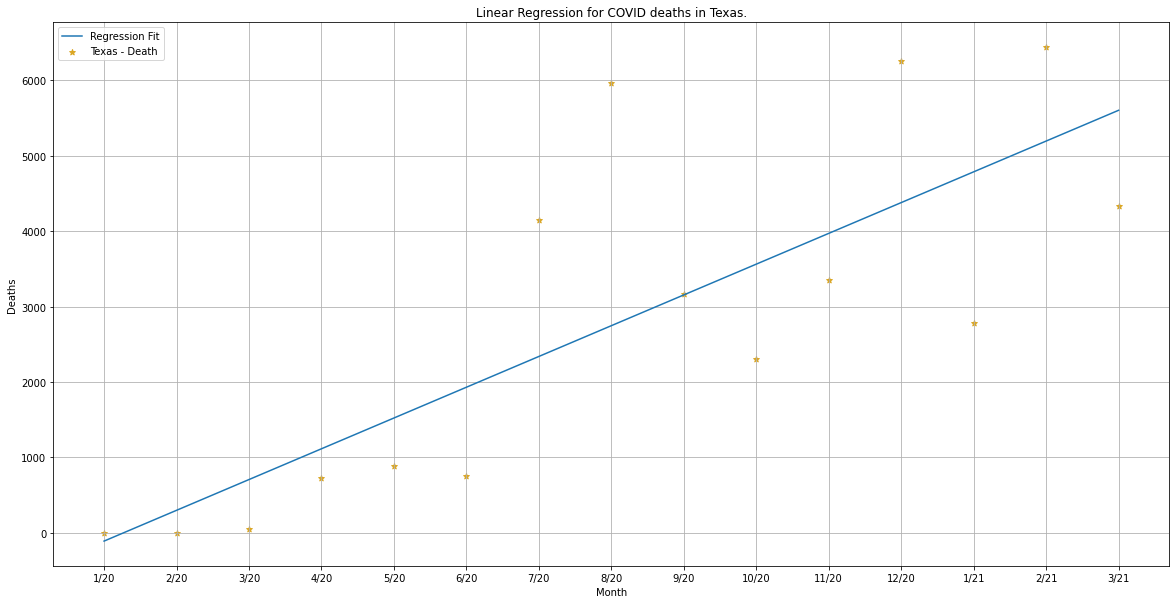

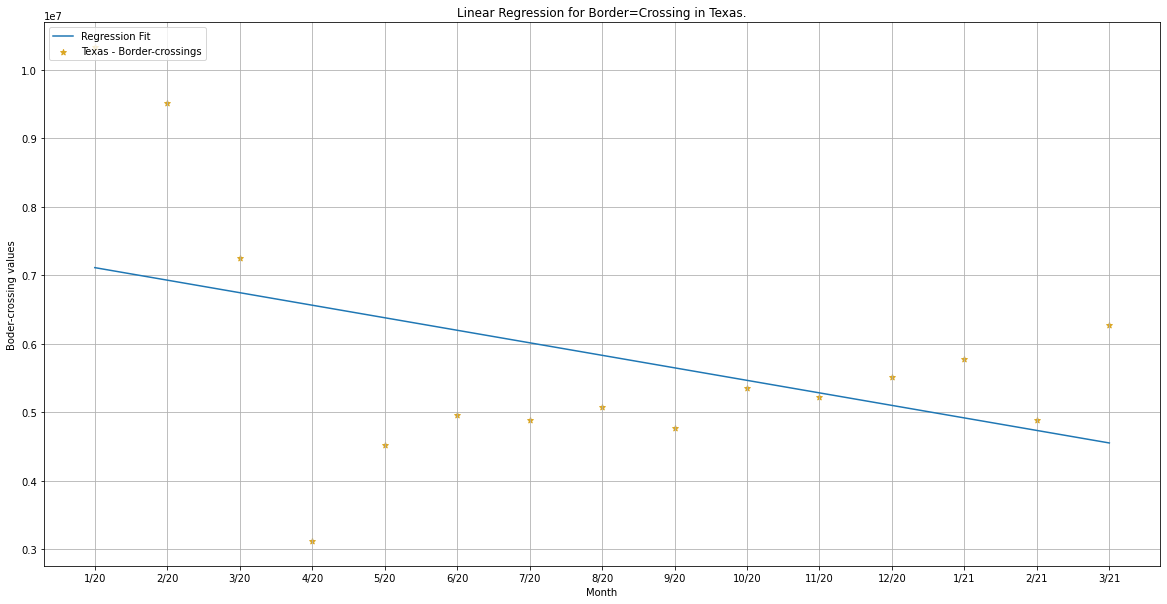

In [ ]:

# newList = [x / 100 for x in tx_bordercrossing_total]
plt.figure(figsize=(20, 10))
plt.scatter(date_ls, tx_confirm_ls, color='goldenrod', marker='*' ,label='Texas - Confirm')
plt.plot(date_ls, fitC ,label='Regression  Fit')
plt.xlabel('Month')
plt.ylabel('Confirm Cases')
plt.title("Linear Regression for COVID confirm cases in Texas.")
plt.legend(loc="upper left")
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(date_ls, tx_death_ls, color='goldenrod', marker='*' ,label='Texas - Death')
plt.plot(date_ls, fitD ,label='Regression Fit')
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title("Linear Regression for COVID deaths in Texas.")
plt.legend(loc="upper left")
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(date_ls, tx_bordercrossing_total, color='goldenrod', marker='*' ,label='Texas - Border-crossings')
plt.plot(date_ls, fitB ,label='Regression Fit')
plt.xlabel('Month')
plt.ylabel('Boder-crossing values')
plt.title("Linear Regression for Border=Crossing in Texas.")
plt.legend(loc="upper left")
plt.grid()
plt.show()

### **Prediction with Linear Regression**

Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 


Prediction of the confirm cases in Texas during 4/2021: 333631.14285714284

Prediction of the confirm cases in Texas during 5/2021: 355970.9107142857

Prediction of the confirm cases in Texas during 6/2021: 378310.67857142864

Prediction of the confirm cases in Texas during 7/2021: 400650.4464285715

Prediction of the confirm cases in Texas during 8/2021: 422990.2142857143


Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 


Prediction of the deaths in Texas during 4/2021: 6012.333333333333

Prediction of the deaths in Texas during 5/2021: 6420.658333333333

Prediction of the deaths in Texas during 6/2021: 6828.983333333333

Prediction of the deaths in Texas during 7/2021: 7237.308333333333

Prediction of the deaths in Texas during 8/2021: 7645.633333333333


Predicting confirm cases for April 2021, May 2021, June 2021, July 2021, Aug 2021: 


Prediction of the border-crossing in Texas during 4/2021: 4369567.419047618

Prediction of the border-crossing in Texas during 5/2021: 4186637.2797619044

Prediction of the border-crossing in Texas during 6/2021: 4003707.14047619

Prediction of the border-crossing in Texas during 7/2021: 3820777.001190476

Prediction of the border-crossing in Texas during 8/2021: 3637846.8619047618